In [1]:
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df = df.drop(columns='Id')

In [5]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [6]:
df = pd.concat([df, category], axis=1)
df = df.drop(columns='Species')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [7]:
dataset = df.values

x = dataset[:,0:4]
y = dataset[:,4:7]

In [8]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_norm = norm.fit_transform(x)
x_norm

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.3)

In [10]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      self.model.stop_training = True

callback = myCallback()

In [13]:
hist = model.fit(x_train, y_train, epochs=100, callbacks=[callback])

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.0553 - accuracy: 0.3524
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0177 - accuracy: 0.4762
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9861 - accuracy: 0.7238
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9523 - accuracy: 0.6571
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9182 - accuracy: 0.6476
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8850 - accuracy: 0.6476
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8509 - accuracy: 0.6476
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8178 - accuracy: 0.6476
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7843 - accuracy: 0.6476
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7513 - accuracy: 0.6476
Epoch 11/100
4/4 [===========

In [14]:
model.evaluate(x_test, y_test)

2/2 [==============================] - 0s 13ms/step - loss: 0.2438 - accuracy: 0.9333


[0.24380730092525482, 0.9333333373069763]

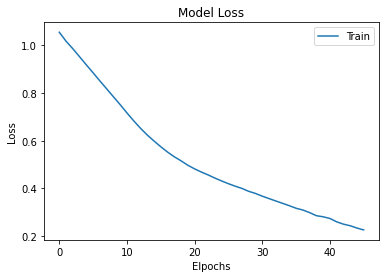

In [15]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Elpochs')
plt.legend(['Train'], loc=0)
plt.show()

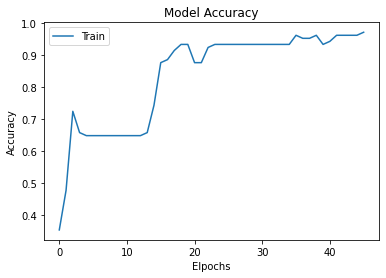

In [16]:
plt.plot(hist.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Elpochs')
plt.legend(['Train'], loc=0)
plt.show()